In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Import dataset, initialize theta matrix, and set X matrix and y vector
fname = os.path.join(".", "winequality-red.csv")
data = np.loadtxt(fname, skiprows=1, delimiter=";")

# get data shape
M,N = np.shape(data)

# matrices
y = np.reshape(data[:,-1], (M,1))
X = np.c_[np.ones(M), data[:,:-1]]
theta = np.zeros(N)

# print(y)
# print(theta)
# print(X)
# print(data)

In [3]:
# normalize X data
avg = np.average(X[:, 1:], 0)
std = np.std(X[:, 1:], 0)
X[:,1:] = (X[:,1:] - avg) / std


In [4]:
# implement the cost function
# hypothesis function is theta transposed multiplied by X
def compute_cost(X, y, theta):
    J = (1/(2*M)) * np.sum((np.reshape(np.sum(theta * X, 1), (M, 1)) - y)**2)
#     print(J)
    return J

In [5]:
# implement gradient descent
alpha = 0.3
num_iters = np.arange(1000)
cost_data = np.zeros(len(num_iters))
def gradient_descent(X, y, theta, alpha, num_iters):
    for i in num_iters:
        theta = theta - alpha*(1/M)*np.sum((np.reshape(np.sum(theta*X, 1), (M, 1)) - y) * X, 0)
        cost_data[i] = compute_cost(X, y, theta)
    return theta

Text(0.5, 1.0, 'Cost Value of J at each Iteration')

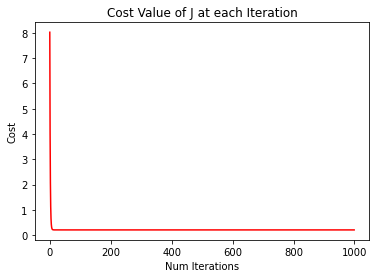

In [6]:
theta = gradient_descent(X, y, theta, alpha, num_iters)
# plot the cost of J to see if it is dropping logarithmically
plt.plot(num_iters, cost_data, 'r')
plt.xlabel('Num Iterations')
plt.ylabel('Cost')
plt.title('Cost Value of J at each Iteration')

In [7]:
# set parameters: 
# fixed acidity: 5, volatile acidity: 0.2, citric acid: 0, residual sugar: 0.5, chlorides: 0.075
# free sulfur dioxide: 5, total sulfur dioxide: 20, density: 0.997, pH: 3.5, sulphates: 0.3
# alcohol: 12
parameters = np.array([5, 0.2, 0, 0.5, 0.075, 5, 20, 0.997, 3.5, 0.3, 12])

#Normalize our parameters
parameters = np.append([1], [(parameters - avg) / std])

# Predict cost
print(parameters @ theta.T)

6.0115233501358105


In [8]:
# Repeat the process with the normal equation and multivariate linear regression matrix cost function
# matrices
y = np.reshape(data[:,-1], (M,1))
X = np.c_[np.ones(M), data[:,:-1]]
theta = np.zeros(N)

In [9]:
def cost_multi(X, y, theta):
    return ((1/(2*M)) * (np.reshape(X @ theta, (M,1)) - y).T @ (np.reshape(X @ theta, (M, 1)) - y))[0][0]

In [10]:
# checking to make sure vectorized multivariate cost function is same output as previous
print(cost_multi(X, y, theta))
print(compute_cost(X, y, theta))


16.208255159474675
16.20825515947467


In [11]:
# instead of iterating through gradient descent and normalizing data, implement normal equation
def normal_equation(X, y, theta):
    return np.linalg.inv((X.T @ X)) @ X.T @ y


In [12]:
# assign theta to normal equation outputs
theta = normal_equation(X, y, theta)

In [13]:
# Make prediction based on normal equation, this time without normalizing parameters
# set parameters: 
# fixed acidity: 5, volatile acidity: 0.2, citric acid: 0, residual sugar: 0.5, chlorides: 0.075
# free sulfur dioxide: 5, total sulfur dioxide: 20, density: 0.997, pH: 3.5, sulphates: 0.3
# alcohol: 12
parameters = np.array([1, 5, 0.2, 0, 0.5, 0.075, 5, 20, 0.997, 3.5, 0.3, 12])

print((parameters @ theta)[0])

6.0115233491251985


In [14]:
# testing kernel
print(parameters)